In [1]:
# 데이터 분석 패키지
import numpy as np
import pandas as pd

In [2]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', 50)  # None으로 설정하면 모든 행 출력

In [3]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# matplotlib 한글지원 패키지
import koreanize_matplotlib

In [5]:
# 날짜는 파이썬 표준라이브러리 datetime 사용
import datetime
# 오늘 날짜 구하기
today = datetime.datetime.today()
today = today.strftime('%Y-%m-%d')
today

'2024-12-23'

In [6]:
df_etfs = pd.read_csv(f'etf_{today}.csv')

In [7]:
df_etfs.shape

(930, 12)

In [8]:
df_etfs.head()

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,459580,6,KODEX CD금리액티브(합성),1057825,2,175,0.02,1057729.0,0.8370,60557,64058,94621
1,357870,6,TIGER CD금리투자KIS(합성),55440,2,5,0.01,55439.0,0.8459,35928,1991,67040
2,360750,4,TIGER 미국S&P500,21440,2,285,1.35,21377.0,12.1448,775879,16634,65510
3,069500,1,KODEX 200,32090,2,225,0.71,32153.0,-7.3612,1005851,32320,55002
4,133690,4,TIGER 미국나스닥100,137515,2,1785,1.32,137154.0,15.8333,89061,12260,43936


In [9]:
# 거래량 기준으로 상위 10개 데이터 가져오기
df_etfs.sort_values('Volume', ascending=False).head(10)

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
27,252670,3,KODEX 200선물인버스2X,2580,5,-30,-1.15,2579.0,15.7427,32705183,84108,12748
24,233740,3,KODEX 코스닥150레버리지,6385,2,40,0.63,6387.0,-26.5200,10178624,65591,15669
116,251340,3,KODEX 코스닥150선물인버스,4265,5,-15,-0.35,4282.0,13.6786,6467777,27441,2683
13,122630,3,KODEX 레버리지,13940,2,165,1.20,14016.0,-16.0829,4450328,62235,21565
68,114800,3,KODEX 인버스,4790,5,-35,-0.73,4792.0,8.5489,3966154,18970,5307
162,462330,2,KODEX 2차전지산업레버리지,1236,5,-54,-4.19,1241.0,-47.3470,3411465,4317,1718
106,364980,2,TIGER 2차전지TOP10,8385,5,-205,-2.39,8413.0,-23.3378,2856026,24244,3098
29,229200,1,KODEX 코스닥150,11020,2,45,0.41,11009.0,-12.8969,1743378,19299,11483
302,412570,2,TIGER 2차전지TOP10레버리지,1365,5,-75,-5.21,1376.0,-44.4016,1321503,1842,661
3,069500,1,KODEX 200,32090,2,225,0.71,32153.0,-7.3612,1005851,32320,55002


In [10]:
# 등락율 기준으로 상위 10개 데이터 가져오기
df_etfs.sort_values('ChangeRate', ascending=False).head(10)

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
387,498270,4,KOSEF 미국양자컴퓨팅,10030,2,645,6.87,9866.0,NaN,303102,3026,381
840,256450,4,PLUS 심천차이넥스트(합성),10320,2,580,5.95,9793.0,51.3597,1,0,52
637,419650,4,PLUS 글로벌수소&차세대연료전지,3770,2,210,5.90,3775.0,-1.9284,1427,5,109
505,463250,2,TIGER 우주방산,11230,2,515,4.81,11236.0,-1.2443,46870,524,202
877,438210,4,PLUS 글로벌AI,16030,2,735,4.81,15955.0,31.9103,948,15,40
904,098560,2,TIGER 방송통신,7550,2,340,4.72,7573.0,7.1004,10363,78,29
614,417450,4,RISE 글로벌수소경제,7255,2,300,4.31,7287.0,4.8229,1546,11,120
336,494670,2,TIGER 조선TOP10,12260,2,490,4.16,12274.0,NaN,231763,2835,515
788,491820,2,HANARO 전력설비투자,11510,2,460,4.16,11526.0,NaN,505,5,63
837,437550,7,히어로즈 글로벌리츠이지스액티브,10710,2,410,3.98,10651.0,-6.2358,586,6,54


In [11]:
# 파생열 추가 CategoryName
df_etfs['CategoryName'] = df_etfs['Category']

# df_etfs['CategoryName'] 코드명으로 변경
# 1.국내 시장지수 2.국내 업종/테마 3.국내파생 4.해외주식 5.원자재 6.채권 7.기타
category_decode = ['국내 시장지수','국내 업종/테마','국내파생','해외주식','원자재','채권','기타']
df_etfs['CategoryName'] = df_etfs['CategoryName'].replace([ i+1 for i in range(7)],category_decode)

In [12]:
df_etfs.head(1)

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,CategoryName
0,459580,6,KODEX CD금리액티브(합성),1057825,2,175,0.02,1057729.0,0.837,60557,64058,94621,채권


In [13]:
df_etfs.columns.tolist()

['Symbol',
 'Category',
 'Name',
 'Price',
 'RiseFall',
 'Change',
 'ChangeRate',
 'NAV',
 'EarningRate',
 'Volume',
 'Amount',
 'MarCap',
 'CategoryName']

### 파생열 추가하기

#### 1) 카테고리명

In [14]:
# 데이터 프레임의 열 위치 바꾸는 방법
# case1) 열 재배지
columns = ['Symbol', 'Category', 'CategoryName', 'Name', 'Price', 'RiseFall', 'Change', 'ChangeRate', 'NAV', 'EarningRate', 'Volume', 'Amount', 'MarCap']
df_etfs = df_etfs[columns]
# case2) insert('삽입위치','열이름','값') 메소드
# df_etfs.insert?
# df_etfs.insert(2,'CategoryName',df_etfs.pop('CategoryName'))
# case3) reindex() 메소드
# df_etfs.reindex?
# df_etfs = df_etfs.reindex(columns = columns)

In [15]:
df_etfs.head(1)

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,459580,6,채권,KODEX CD금리액티브(합성),1057825,2,175,0.02,1057729.0,0.837,60557,64058,94621


#### 2) 브랜드 

In [16]:
# df_etfs['Name'].str.split?
df_etfs['Brand'] = df_etfs['Name'].str.split(' ').map(lambda list:list[0])

In [17]:
df_etfs.head(1)

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand
0,459580,6,채권,KODEX CD금리액티브(합성),1057825,2,175,0.02,1057729.0,0.837,60557,64058,94621,KODEX


In [18]:
# 브랜드별 차지비중 보기
# df['컬럼명' ].value_counts() : 특정 컬럼의 고유값의 개수를 계산
# df['컬럼명' ].value_counts(normalize=True) : 특정 컬럼의 고유값의 개수를 계산하고 각 값의 비율을 반환
df_etfs['Brand'].value_counts(normalize=True)

Brand
KODEX         0.217204
TIGER         0.215054
RISE          0.126882
ACE           0.094624
PLUS          0.069892
HANARO        0.058065
SOL           0.056989
KOSEF         0.049462
히어로즈          0.016129
TIMEFOLIO     0.013978
WON           0.012903
KoAct         0.009677
1Q            0.008602
에셋플러스         0.008602
BNK           0.005376
파워            0.005376
HK            0.004301
UNICORN       0.004301
마이티           0.003226
마이다스          0.003226
FOCUS         0.003226
KCGI          0.003226
DAISHIN343    0.002151
VITA          0.002151
TRUSTON       0.002151
TREX          0.002151
ITF           0.001075
Name: proportion, dtype: float64

In [19]:
df_etfs['Brand'].value_counts(normalize=True).map(lambda x:f'{x*100:.2f}%')

Brand
KODEX         21.72%
TIGER         21.51%
RISE          12.69%
ACE            9.46%
PLUS           6.99%
HANARO         5.81%
SOL            5.70%
KOSEF          4.95%
히어로즈           1.61%
TIMEFOLIO      1.40%
WON            1.29%
KoAct          0.97%
1Q             0.86%
에셋플러스          0.86%
BNK            0.54%
파워             0.54%
HK             0.43%
UNICORN        0.43%
마이티            0.32%
마이다스           0.32%
FOCUS          0.32%
KCGI           0.32%
DAISHIN343     0.22%
VITA           0.22%
TRUSTON        0.22%
TREX           0.22%
ITF            0.11%
Name: proportion, dtype: object

In [20]:
df_etfs.plot?

Signature:      df_etfs.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x000002234ABEA4E0>
File:           d:\kdt_2\anaconda3\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
 

Text(0.5, 1.0, '브랜드 비중')

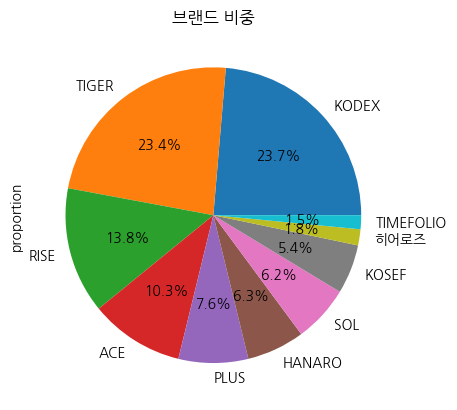

In [21]:
df_etfs['Brand'].value_counts(normalize=True).sort_values(ascending=False).head(10).plot(kind='pie',autopct='%1.1f%%')
plt.title('브랜드 비중')

#### 인버스 비중

In [22]:
# 인버스 상품 가져오기
df_etfs[df_etfs['Name'].str.contains('인버스')].head(3)

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand
27,252670,3,국내파생,KODEX 200선물인버스2X,2580,5,-30,-1.15,2579.0,15.7427,32705183,84108,12748,KODEX
68,114800,3,국내파생,KODEX 인버스,4790,5,-35,-0.73,4792.0,8.5489,3966154,18970,5307,KODEX
116,251340,3,국내파생,KODEX 코스닥150선물인버스,4265,5,-15,-0.35,4282.0,13.6786,6467777,27441,2683,KODEX


In [23]:
# 인버스상품과 아닌 상품의 비율구하기
df_etfs['인버스'] = df_etfs['Name'].str.contains('인버스')
df_etfs['인버스'].value_counts(normalize=True)*100

인버스
False    95.268817
True      4.731183
Name: proportion, dtype: float64

In [24]:
# 레버리지 상품과 아닌 상품의 비율구하기
df_etfs['레버리지'] = df_etfs['Name'].str.contains('레버리지')
df_etfs['레버리지'].value_counts(normalize=True)*100

레버리지
False    94.946237
True      5.053763
Name: proportion, dtype: float64

In [25]:
# 헤지 상품과 아닌 상품의 비율구하기
df_etfs['헤지'] = df_etfs['Name'].str.endswith('(H)')
df_etfs['헤지'].value_counts(normalize=True)*100

헤지
False    93.333333
True      6.666667
Name: proportion, dtype: float64

In [26]:
df_etfs.head(2)

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand,인버스,레버리지,헤지
0,459580,6,채권,KODEX CD금리액티브(합성),1057825,2,175,0.02,1057729.0,0.8370,60557,64058,94621,KODEX,False,False,False
1,357870,6,채권,TIGER CD금리투자KIS(합성),55440,2,5,0.01,55439.0,0.8459,35928,1991,67040,TIGER,False,False,False


In [27]:
df_etfs[df_etfs['레버리지']]

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand,인버스,레버리지,헤지
13,122630,3,국내파생,KODEX 레버리지,13940,2,165,1.20,14016.0,-16.0829,4450328,62235,21565,KODEX,False,True,False
24,233740,3,국내파생,KODEX 코스닥150레버리지,6385,2,40,0.63,6387.0,-26.5200,10178624,65591,15669,KODEX,False,True,False
137,423920,4,해외주식,TIGER 미국필라델피아반도체레버리지(합성),24290,2,890,3.80,24233.0,7.1870,43670,1063,2186,TIGER,False,True,False
155,409820,4,해외주식,KODEX 미국나스닥100레버리지(합성 H),12490,2,405,3.35,12431.0,10.2143,82504,1032,1861,KODEX,False,True,False
162,462330,2,국내 업종/테마,KODEX 2차전지산업레버리지,1236,5,-54,-4.19,1241.0,-47.3470,3411465,4317,1718,KODEX,False,True,False
222,418660,4,해외주식,TIGER 미국나스닥100레버리지(합성),26660,2,670,2.58,26537.0,33.3162,24268,648,1146,TIGER,False,True,False
248,204480,4,해외주식,TIGER 차이나CSI300레버리지(합성),19400,2,15,0.08,19620.0,66.1808,568,10,1001,TIGER,False,True,False
262,465610,4,해외주식,ACE 미국빅테크TOP7 Plus레버리지(합성),30800,2,1005,3.37,30354.0,50.6319,28134,867,955,ACE,False,True,False
284,452250,6,채권,ACE 미국30년국채선물레버리지(합성 H),5735,2,5,0.09,5735.0,-22.1468,89094,511,797,ACE,False,True,False
293,267770,3,국내파생,TIGER 200선물레버리지,10645,2,145,1.38,10646.0,-16.5674,38111,407,724,TIGER,False,True,False


In [28]:
file_name = f'new_etf_{today}.csv'
file_name

'new_etf_2024-12-23.csv'

In [29]:
df_etfs.to_csv(file_name, index=False)